# Assignment 1 - 184142R - Razan M.M.M

# Sentiment analysis of posts by public figures

Import the needed libraries. Pandas - a python library used to analyze data. nltk - provides us various text processing libraries with a lot of test datasets. re - functions used to check if a particular string matches a given regular expression. matplotlib - library for creating static, animated, and interactive visualizations in Python

In [1]:
import pandas as pd
import nltk
import re
import matplotlib.pyplot as plt

# Import Dataset

"Singlish" dataset created by the batch, which includes twitter posts of the public figures and manually annotated as positive/negative based on their impact on the society has been used for the sentiment analysis. 1st 10 data from the dataset has been printed. The columns available in the dataset are Index number of the collected person, Public figures' name, statment, impact and an unnamed column

In [2]:
tweet_corpus = pd.read_csv('./Singlish.csv')
tweet_corpus.head(10)

,Index,PublicFigure,Statement,Impact,Unnamed: 4
0,184174P,Abisheka Wimalaweera,සාමාන්‍යයෙන් පෞද්ගලික චරිත ගැන ලියන්න හොද නෑ....,Positive,NaN
1,NaN,Roshan Fernando,මම නුවරඑළියේ ඉදන් කොළඹට ඇවිල්ලා ගායකයෙක් වෙන්න...,Positive,NaN
2,NaN,Rasika Jayakodi,Ego system Vs. Eco system \n\nසාමාන්‍යයෙන් ලංක...,Positive,NaN
3,NaN,Peshala Manoj,අද උදේ දැකපු සුන්දර දර්ශණයක්. නුගේගොඩ St.Johns...,Positive,NaN
4,NaN,Mahinda Deshapriya,"Smoking is a bad habit \nMenda , Danee🏏✌.\nCri...",Positive,NaN
5,NaN,Madhavi Anthony,"Safety Airbag නැති, Sensors නැති, Auto Break s...",Negative,NaN
6,NaN,Shalani Tharuka,ජීවිතේ අපිට එක එක ජාතියේ පුද්ගලයින් හමුවෙනවා. ...,Negative,NaN
7,NaN,Ajith Perera(Master Potter),උපකරන...\nඇයි අපිට විතරක් මෙහෙම උනේ...\nමම ජීව...,Negative,NaN
8,NaN,Rasika Jayakodi,ඇත්තට ම ආණ්ඩුව විසින් කළ යුතුව තිබුණේ ආදායම් බ...,Negative,NaN
9,NaN,Tushara Wickramanayaka,දරුවො forward විය යුතුයි - මෙන්න දේශ පාලනයට සු...,Negative,NaN


Shape function provided by pandas shows the number of rows, columns which is 1119 rows of data and 5 columns of data

In [3]:
tweet_corpus.shape

(1119, 5)

# Data Preprocessing

### Add a column to get the Length of statments

A column is added to include the Length of statments which is the number of charachers available in a sentence. I have printed the 1st 5 rows of data to visualize.

In [4]:
length = []
for index, row in tweet_corpus.iterrows():
    length.append(len(row['Statement']))
    
tweet_corpus['Length of Statment'] = length
tweet_corpus.head()

,Index,PublicFigure,Statement,Impact,Unnamed: 4,Length of Statment
0,184174P,Abisheka Wimalaweera,සාමාන්‍යයෙන් පෞද්ගලික චරිත ගැන ලියන්න හොද නෑ....,Positive,NaN,479
1,NaN,Roshan Fernando,මම නුවරඑළියේ ඉදන් කොළඹට ඇවිල්ලා ගායකයෙක් වෙන්න...,Positive,NaN,403
2,NaN,Rasika Jayakodi,Ego system Vs. Eco system \n\nසාමාන්‍යයෙන් ලංක...,Positive,NaN,1095
3,NaN,Peshala Manoj,අද උදේ දැකපු සුන්දර දර්ශණයක්. නුගේගොඩ St.Johns...,Positive,NaN,298
4,NaN,Mahinda Deshapriya,"Smoking is a bad habit \nMenda , Danee🏏✌.\nCri...",Positive,NaN,91


The below is a description about the column "Length of Statment". It shows that there are 1119 rows of data. mean charactes per sentence is 219. There is a sentence with 11182 characters also.

In [5]:
tweet_corpus['Length of Statment'].describe()

count     1119.000000
mean       219.149240
std        420.385316
min         16.000000
25%         80.000000
50%        137.000000
75%        231.000000
max      11182.000000
Name: Length of Statment, dtype: float64

### Remove data which contains more than 1000 characters per sentence

The below drop all the rows of data with senetences which have more than 1000 characters in it as a preprocessing.

In [6]:
tweet_corpus = tweet_corpus.drop(tweet_corpus[tweet_corpus['Length of Statment'] > 1000].index)
tweet_corpus.reset_index(drop=True, inplace=True)

After removing the lenghtier senetnces, when I use the describe() function again to visualize the characteristics of the "Length of Statment" column it shows that maximum characters per sentence is 980 now.

In [7]:
tweet_corpus['Length of Statment'].describe()

count    1095.000000
mean      180.049315
std       154.735705
min        16.000000
25%        80.000000
50%       132.000000
75%       222.000000
max       980.000000
Name: Length of Statment, dtype: float64

### Select 100 datas

From the twitter corpus I select only the first 100 data to proceed

In [8]:
tweet_corpus = tweet_corpus[0:100]

I check the number of Positives and negatives from the "Impact" column. And Approximately Positive counts and negative counts are equal.

In [9]:
tweet_corpus["Impact"].value_counts()

Positive    51
Negative    49
Name: Impact, dtype: int64

Next I remove the data if the impact is not equal to "Postive" or "Negative" and select only the labeled data.

In [10]:
tweet_corpus = tweet_corpus[(tweet_corpus['Impact'] == 'Positive') | (tweet_corpus['Impact'] == 'Negative')]

### Visualize Impact

Uisng the pie() function from matplotlib library I visulaize the impact of positive/negative using a pie chart. And the count of postives and the negatives has been shown as a percentage. 

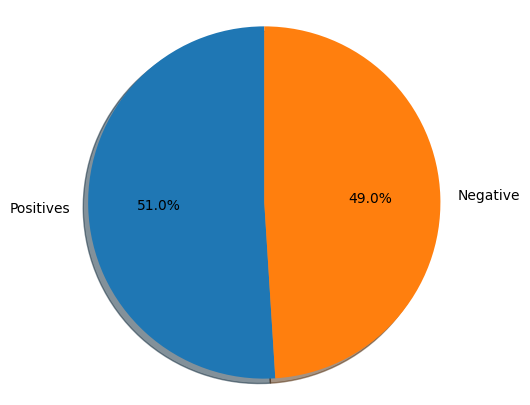

In [11]:
fig = plt.figure(figsize=(5, 5))

labels = 'Positives', 'Negative'

sizes = [len(tweet_corpus[(tweet_corpus['Impact']=='Positive')]), len(tweet_corpus[(tweet_corpus['Impact']=='Negative')])]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')  

plt.show()

### Change the Impact Positive to 1 and Negative to 0

The Impact positive has been replaced with 1 and negative has been replaced with 0. When I print the Impact column I can visualize that. But eventhough 1 and 0 are used that is in the data type-object

In [12]:
tweet_corpus.loc[(tweet_corpus['Impact'] == 'Positive', 'Impact')] = 1
tweet_corpus.loc[(tweet_corpus['Impact'] == 'Negative', 'Impact')] = 0

In [13]:
tweet_corpus['Impact']

0     1
1     1
2     1
3     1
4     0
     ..
95    1
96    0
97    0
98    0
99    0
Name: Impact, Length: 100, dtype: object

Data type of the impact column has been converted to int from object

In [14]:
tweet_corpus['Impact'] = pd.Series(tweet_corpus['Impact'], dtype="int")

### Remove unwanted columns

Unwanted columns columns such as index number, public figure name and unnamed column are removed. Select only the wanted columns, statment and the impact

In [15]:
tweet_corpus = tweet_corpus[['Statement', 'Impact']]

### Remove the emoji

Using the compile() function from re library a regex has been used to remove the emojis from the tweets

In [16]:
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F" 
        u"\U0001F300-\U0001F5FF" 
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
        u"\U00002500-\U00002BEF"
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"
        u"\u3030"
                      "]+", re.UNICODE)

tweet_corpus['Statement'] = tweet_corpus['Statement'].apply(lambda x: emoji_pattern.sub(r'', x))

Print the 1st 10 data to check there's no any emojis available in the data now.

In [17]:
tweet_corpus.head(10)

,Statement,Impact
0,සාමාන්යයෙන් පෞද්ගලික චරිත ගැන ලියන්න හොද නෑ.ඒ...,1
1,මම නුවරඑළියේ ඉදන් කොළඹට ඇවිල්ලා ගායකයෙක් වෙන්න...,1
2,අද උදේ දැකපු සුන්දර දර්ශණයක්. නුගේගොඩ St.Johns...,1
3,"Smoking is a bad habit \nMenda , Danee.\nCrick...",1
4,"Safety Airbag නැති, Sensors නැති, Auto Break s...",0
5,ජීවිතේ අපිට එක එක ජාතියේ පුද්ගලයින් හමුවෙනවා. ...,0
6,දරුවො forward විය යුතුයි - මෙන්න දේශ පාලනයට සු...,0
7,හෙළPay for Business\niOS App එක මේ වන විට Appl...,1
8,Shooting වලට නුවර ගියපු මගේ හිත ගිය තැනක්.. \n...,1
9,මේ ලස්සන අහිංසක මුහුනු වලට හිනාවක් ගේන්න අපිට ...,1


iloc() function from pandas is used to easily retrieve any particular value from a row or column by using index values. I used it to check a data element from the dataset

In [18]:
tweet_corpus.iloc[8]

Statement    Shooting වලට නුවර ගියපු මගේ හිත ගිය තැනක්.. \n...
Impact                                                       1
Name: 8, dtype: object

### Translate tweets to English from Singlish

Using the googletrans I translated the siglish sentences to complete english sentences

In [19]:
!pip install googletrans


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Install tqdm  which is a library in Python which is used for creating Progress Meters or Progress Bars

In [20]:
!pip install tqdm


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Checking whether sinhala to english is available in the google translator

In [21]:
import googletrans
from googletrans import Translator
translator = Translator()
lang_df = pd.DataFrame.from_dict(googletrans.LANGUAGES,  orient='index', columns=['Language'])
lang_df[lang_df.Language.isin(['english', 'sinhala'])]

,Language
en,english
si,sinhala


The below code is to retrieving the [0] index senetnce from the dataset and translating it to english and view whether it is translated correctly.

In [22]:
text = tweet_corpus.iloc[0]['Statement']
translator.translate(text, dest='en', src='auto').text

"Generally, it is not good to write about personal characters because we cannot predict what will happen to those people in the future. .I said that it doesn't matter if it's like Kohli, because if that happens, the fans will say get well soon.\n\nThis is the TEAM of Sri Lanka..we want Sri Lanka to win.\nEven from Sri Lanka, we have a cold today...\n\nCricketers are people!\n\nMay the lions bring the cup.."

All the sentences will be translated to english using the below code. And tqdm will show a progress bar while the singlish is being converted to english. I can easily figure out how much of the senetences are being translated while it is translating

In [23]:
from tqdm import tqdm

translated_statement = []
for index, row in tqdm(tweet_corpus.iterrows()):
    translated_text = translator.translate(row['Statement'], dest='en', src='auto').text
    translated_statement.append(translated_text)
tweet_corpus['Statement'] = translated_statement

100it [00:26,  3.74it/s]


1st 10 data after the complete translation to english are listed below

In [24]:
tweet_corpus.head(10)

,Statement,Impact
0,"Generally, it is not good to write about perso...",1
1,I came to Colombo from Nuwara Eliya and am try...,1
2,A beautiful sight seen this morning. At St.Joh...,1
3,"Smoking is a bad habit\nMenda, Danee.\n150+ is...",1
4,If he could buy a JEEP of the kind that he dre...,0
5,In life we ​​meet people of different races. S...,0
6,Children must be forward - here is an uncut di...,0
7,HelaPay for Business\nThe iOS App has been sub...,1
8,A place where I went to Kandy for shooting..\n...,1
9,Last weekend we were able to bring a smile to ...,1


### Stripe, convert to lower case and remove hashtags from tweets

Strip() function from pandas will remove the leading and trailing whitespaces, characters, and symbols. lower() function will convert the complete text to lower case. And the regex written with the help of re library will remove the hastags from tweets.

In [25]:
tweet_corpus['Statement'] = tweet_corpus['Statement'].map(lambda x: x.strip())

tweet_corpus['Statement'] = tweet_corpus['Statement'].apply(lambda x: x.lower())

characters_to_remove = re.compile('[.,\@#$$%|()\+\\*^!?]')
tweet_corpus['Statement'] = tweet_corpus['Statement'].apply(lambda x: characters_to_remove.sub('', x))

Visualizing the 1st 5 data after doing the above changes

In [26]:
tweet_corpus.head()

,Statement,Impact
0,generally it is not good to write about person...,1
1,i came to colombo from nuwara eliya and am try...,1
2,a beautiful sight seen this morning at stjohns...,1
3,smoking is a bad habit\nmenda danee\n150 is en...,1
4,if he could buy a jeep of the kind that he dre...,0


### Remove hyperlink, punctuations and user names

The following regex will remove the hyperlinks, punctuations and the user names. tqdm will show the progress while this is happening

In [27]:
statement = []
for index, row in tqdm(tweet_corpus.iterrows()):
    statement.append(' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",row['Statement']).split()))
tweet_corpus['Statement'] = statement

100it [00:00, 1785.99it/s]


### Remove stop words from the tweets

Download the stopwords from the nltk

In [28]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Default english dtopwords from the nltk are listed below

In [29]:
from nltk.corpus import stopwords  
stopwords_english = stopwords.words('english')
stopwords_english

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

Using the default set of stopwords from nltk, remove those stopwords which are so common and they are basically ignored by typical tokenizers from the dataset

In [30]:
cleaned_statement = []
for index, row in tweet_corpus.iterrows():
    text =  ' '.join([word for word in row['Statement'].split() if word not in stopwords_english])
    cleaned_statement.append(text)
tweet_corpus['Statement'] = cleaned_statement
cleaned_statement

['generally good write personal characters cannot predict happen people future said matter like kohli happens fans say get well soon team sri lankawe want sri lanka win even sri lanka cold today cricketers people may lions bring cup',
 'came colombo nuwara eliya trying become singer brother roshan fernando legend outdoor group music many years experience music industry flashback went studio first time practice loving welcome meeting group brothers also joy privilege life beautiful people let share stagehug',
 'beautiful sight seen morning stjohns college nugegoda remembered time studying bhathkande university india teachers students staff enter university hitting ground saw children stjohns nugegoda morning good luck students',
 'smoking bad habit menda danee 150 enough cricket lovely cricket br',
 'could buy jeep kind dreamed instead cab bought first vehicle 1996 safety airbag sensors auto break system led headlights viper even work properly today elephant fine accident shooting anura

Visualize the 1st 10 data after removing the stopwords

In [31]:
tweet_corpus.head(10)

,Statement,Impact
0,generally good write personal characters canno...,1
1,came colombo nuwara eliya trying become singer...,1
2,beautiful sight seen morning stjohns college n...,1
3,smoking bad habit menda danee 150 enough crick...,1
4,could buy jeep kind dreamed instead cab bought...,0
5,life meet people different races give us love ...,0
6,children must forward uncut diamond suitable g...,0
7,helapay business ios app submitted apple appro...,1
8,place went kandy shooting went shooting sudden...,1
9,last weekend able bring smile beautiful innoce...,1


### Stemming the cleaned tweets

After cleaning the tweets by removing the stopwords, Using the word_tokenize sentences are split in to words and then using the PorterStemmer the words are reduced to its roots of words by removing the affixes, suffixes and prefixes. 

In [32]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

stemmer = PorterStemmer()

stemming_word_list = []
new_statement = []

for index, row in tweet_corpus.iterrows():
    words = word_tokenize(row['Statement'])
    for token in words:
        stemming_word = stemmer.stem(token)    
        stemming_word_list.append(stemming_word)

    result = " ".join(stemming_word_list)
    new_statement.append(result)
    
tweet_corpus['Statement'] = new_statement

### Split the dataset into train(80%) and test(20%)

Uisng the train_test_split() function from the sklearn dataset is divide as 80% training data, that mean 80 data fro traing and 20 data for testing from the chosen 100 data

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(tweet_corpus['Statement'].fillna(' '), tweet_corpus['Impact'], test_size=0.2, random_state=42)

In [34]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

80
20
80
20


# Feature Extraction

### Count vectorize

CountVectorizer from sklearn library converts the collection of text documents from the dataset to a matrix of token counts on the basis of the frequency of each word that occurs in the entire text. The training data set is vectorized to from a matrix

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(min_df= 5, ngram_range=(1,2)).fit(X_train)
X_train_vectorized = vect.transform(X_train)

# Train a model

### Logistic Regression

In the NLP, it's generally accepted that Logistic Regression is a great starter algorithm for text related classification. Logistic regression is said to be a good model fro sentiment analysis because it trains quickly even on large datasets and provides very robust results. Here I have imported the LogisticRegression from sklearn library and used it for the classification.

In [36]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train_vectorized, y_train)

LogisticRegression(max_iter=1000)

# Evaluating the Accuracy of model

Trained model can be used to make predictions on our test data

In [37]:
predictions = model.predict(vect.transform(X_test))

### Find accuracy

roc_auc_score function of the sklearn package calculates the accuracy score for a set of predicted labels against the true labels. The below shows the accuracy of the model rounded to 2 decimal places

In [38]:
from sklearn.metrics import roc_auc_score
acc = roc_auc_score(y_test, predictions)
print("test accuracy: {:.2f}%".format(acc*100))

test accuracy: 80.81%


### Create confusion matrix for test data

confusion_matrix from the sklearn library measures the quality of predictions from a classification model by looking at how many predictions are True and how many are False. Actual test set and the predicted values are passed in to the confusion_matrix. 

In [39]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
matrix=confusion_matrix(y_test,predictions)
print(matrix)

[[8 3]
 [1 8]]


### Plot confusion matrix

The below code shows a function plot_confusion_matrix written in order to draw  the confusion matrix for the positive and negative statments using the actual and predicted results

In [40]:
import itertools
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,
                          figsize=(9, 7)):
    matrix = confusion_matrix(y_true, y_pred)

    if normalize:
        matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=figsize)
    plt.imshow(matrix, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = matrix.max() / 2.
    for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, format(matrix[i, j], fmt),
                 horizontalalignment="center",
                 size=int((figsize[0] / 10) * 38),
                 color="white" if matrix[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

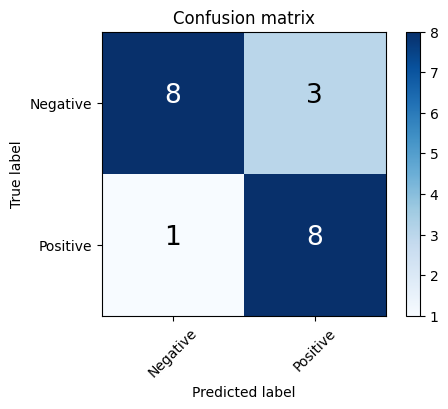

In [41]:
plot_confusion_matrix(y_test, predictions, ['Negative', 'Positive'], figsize=(5, 4))